# 二次元配列と勾配問題

In [1]:
import numpy as np #行列
import pandas as pd #データ分析
import matplotlib.pyplot as plt
import seaborn as sns #matplotlibを使いやすくしたもの
%matplotlib inline




# 問題１　1次関数

In [3]:
x_ndarray = np.arange(-50, 50+0.01, 0.1) #50だと50が含まれないことに注意

In [4]:
len(x_ndarray)

1001

In [5]:
print(x_ndarray)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]


In [6]:
np.set_printoptions(precision=2)
print('{}'.format(x_ndarray))

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]


In [7]:
def function(x):
    y = (1/2)*x + 1
    return y

In [8]:
function(5)

3.5

In [9]:
y_ndarray = function(x_ndarray)

In [10]:
#np.set_printoptions(precision=2)
print('{}'.format(y_ndarray))

[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


In [11]:
x_ndarray.shape

(1001,)

In [12]:
x_ndarray.reshape(1001, 1)


array([[-50. ],
       [-49.9],
       [-49.8],
       ...,
       [ 49.8],
       [ 49.9],
       [ 50. ]])

In [13]:
x_ndarray

array([-50. , -49.9, -49.8, ...,  49.8,  49.9,  50. ])

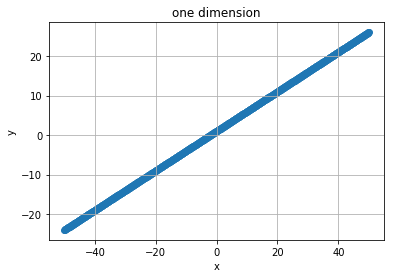

In [15]:
#plt.rcParams["font.family"] = "IPAexGothic"

plt.grid(True)
plt.title('one dimension')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_ndarray, y_ndarray)


# 問題2 配列の結合

In [16]:
len(x_ndarray)

1001

In [17]:
c_narray=np.zeros((1001, 2))

In [18]:
print(c_narray)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [19]:
c_narray.shape

(1001, 2)

In [20]:
c_narray[:, 0] = x_ndarray
c_narray[:, 1] = y_ndarray

In [21]:
print(c_narray)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


In [35]:
d_ndarray = np.concatenate([x_ndarray.reshape(1001, 1), y_ndarray.reshape(1001, 1)], axis=1)

In [36]:
print(d_ndarray)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


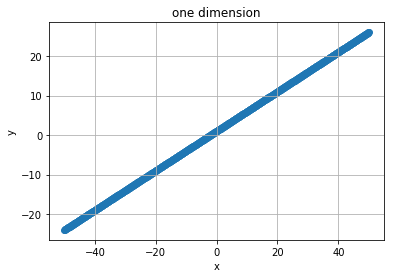

In [37]:
plt.grid(True)
plt.title('one dimension')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(c_narray[:, 0], c_narray[:, 1])

In [38]:
c_narray[:, 0]

array([-50. , -49.9, -49.8, ...,  49.8,  49.9,  50. ])

# 問題３ 勾配を求める

In [39]:
# dx_ndarray = c_narray[1:, 0] - c_narray[:-1, 0]
# dy_ndarray = c_narray[1:, 1] - c_narray[:-1, 1]

# d_ndarray = dy_ndarray / dx_ndarray

In [40]:
dxy_ndarray = c_narray[1:, ] - c_narray[:-1, ]

d_ndarray = dxy_ndarray[:, 1] / dxy_ndarray[:, 0]



In [45]:
d_ndarray[:5]

array([0.5, 0.5, 0.5, 0.5, 0.5])

# 【問題4】グラフを描く

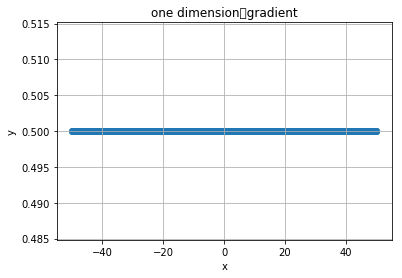

In [47]:
plt.grid(True)
plt.title('one dimension　gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_ndarray[1:], d_ndarray)

# 問題5】Pythonの関数化

In [55]:
def gradient(function, start=-50, end=50, step=0.1): #x_range=(-50, 50.1, 0.1)の書き方の方がスマート

    x_ndarray = np.arange(start, end+step/2, step)

    y_ndarray = function(x_ndarray)

    c_ndarray=np.zeros((len(x_ndarray), 2))

    c_ndarray[:, 0] = x_ndarray
    c_ndarray[:, 1] = y_ndarray
    
    dxy_ndarray = c_ndarray[1:, ] - c_ndarray[:-1, ]

    d_ndarray = dxy_ndarray[:, 1] / dxy_ndarray[:, 0]

#     dx_ndarray = c_ndarray[1:, 0] - c_ndarray[:-1, 0]
#     dy_ndarray = c_ndarray[1:, 1] - c_ndarray[:-1, 1]

#     d_ndarray = dy_ndarray / dx_ndarray
    
    return(c_ndarray, d_ndarray)

In [56]:
def function_1(x):
    y = (1/2)*x + 1
    return y

In [57]:
def function_2(x):
    y = x**2
    return y

In [58]:
def function_3(x):
    y = 2 * x**2 + 2 ** x
    return y

In [59]:
def function_4(x):
    y = np.sin(x ** 0.5)
    return y

In [60]:
def function_5(x):
    y = np.sin(x)
    return y

In [61]:
#c_ndarray, d_ndarray = gradient(function_5, -5, 5, 0.01)

In [62]:
c_ndarray, d_ndarray = gradient(function_2)

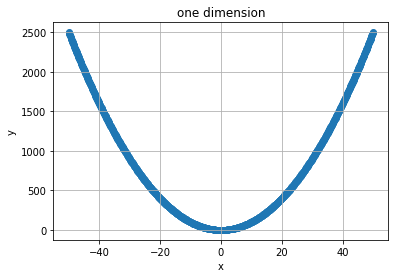

In [63]:

plt.grid(True)
plt.title('one dimension')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(c_ndarray[:, 0], c_ndarray[:, 1])


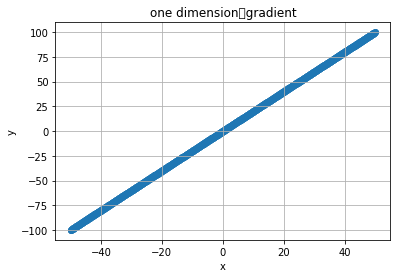

In [64]:
plt.grid(True)
plt.title('one dimension　gradient')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_ndarray[1:], d_ndarray)

In [80]:
def graph_1(function, start=-50, end=50, step=0.1):
    c_ndarray, d_ndarray = gradient(function, start, end, step)
    plt.grid(True)
    plt.title('function & gradient')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(c_ndarray[:, 0], c_ndarray[:, 1], label='function')
    plt.legend()
    return

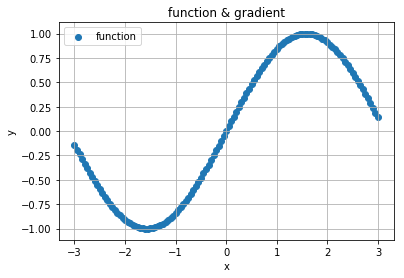

In [81]:
graph_1(function_5, -3, 3, 0.05)

In [82]:
def graph_gradient(function, start=-50, end=50, step=0.1):
    c_ndarray, d_ndarray = gradient(function, start, end, step)
    plt.grid(True)
    plt.title('function & gradient')
    plt.xlabel('x')
    plt.ylabel('y')
#     print(len(c_ndarray[1:]), len(d_ndarray))
#     print(c_ndarray[1:].shape, d_ndarray.shape)
    plt.scatter(c_ndarray[1:, 0], d_ndarray, label='gradient')
    plt.legend()
    return

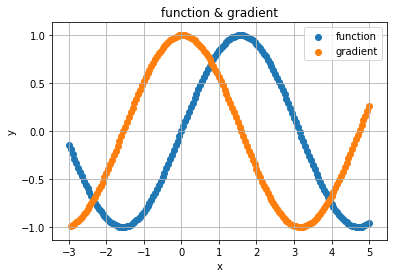

In [83]:
graph_1(function_5, -3, 5, 0.05)
graph_gradient(function_5, -3, 5, 0.05)

In [84]:
#graph_gradient(function_5, -3, 3, 0.05)

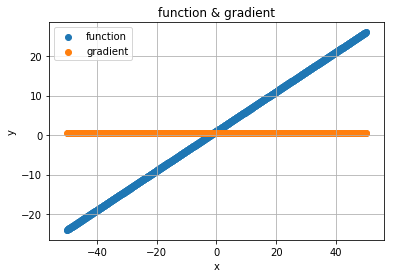

In [85]:
graph_1(function_1)
graph_gradient(function_1)

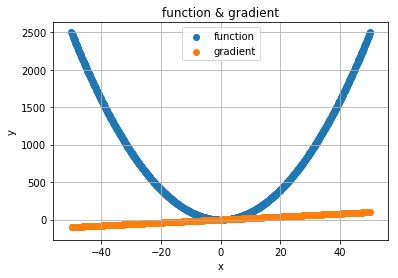

In [87]:
graph_1(function_2)
graph_gradient(function_2)

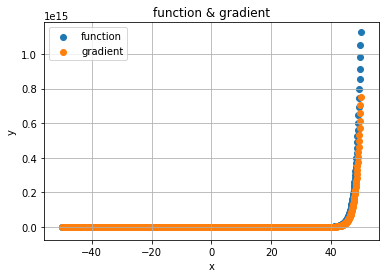

In [91]:
graph_1(function_3)
graph_gradient(function_3)

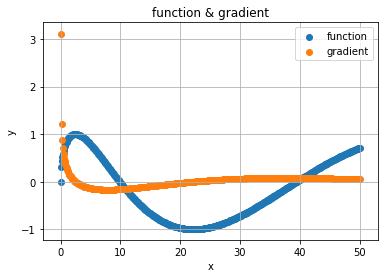

In [92]:
graph_1(function_4, 0, 50, 0.1)
graph_gradient(function_4, 0, 50, 0.1)

# 問題6】最小値を求める

In [110]:
def function_min(function, start=-50, end=50, step=0.1):

    x_ndarray = np.arange(start, end+step/2, step)
    y_ndarray = function(x_ndarray)
    y_min = y_ndarray.min()
    x_min = x_ndarray[y_ndarray.argmin()]
#     c_ndarray=np.zeros((len(x_ndarray), 2))

#     c_ndarray[:, 0] = x_ndarray
#     c_ndarray[:, 1] = y_ndarray

#     dx_ndarray = c_ndarray[1:, 0] - c_ndarray[:-1, 0]
#     dy_ndarray = c_ndarray[1:, 1] - c_ndarray[:-1, 1]

#     d_ndarray = dy_ndarray / dx_ndarray

    c_ndarray=np.zeros((len(x_ndarray), 2))
    c_ndarray[:, 0] = x_ndarray
    c_ndarray[:, 1] = y_ndarray
    
    dxy_ndarray = c_ndarray[1:, ] - c_ndarray[:-1, ]
    d_ndarray = dxy_ndarray[:, 1] / dxy_ndarray[:, 0]
    grad1 = d_ndarray[y_ndarray.argmin()-1] 
    grad2 = d_ndarray[y_ndarray.argmin()] 
    return x_min, y_min, grad1, grad2

In [111]:
def function_6(x):
    y = x**2 + 1
    return y

In [112]:
def function_7(x):
    y = (x-1) **2 + 3
    return y

In [113]:
function_min(function_7)

(1.0000000000007248, 3.0, -0.09999999999855316, 0.10000000000145307)

x= 1.00で最小となり、最小値はy= 3.0。前後の傾きは-0.100,  0.100


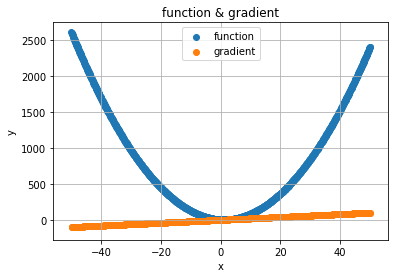

In [127]:
func=function_7
ｆ = function_min(func)
graph_1(func)
graph_gradient(func)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x=-50.00で最小となり、最小値はy=-24.0。前後の傾きは 0.500,  0.500


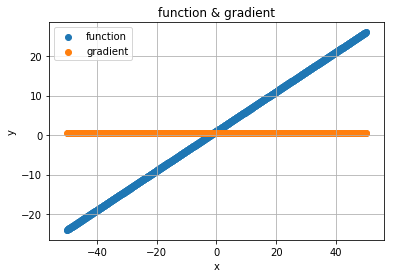

In [128]:
func=function_1
ｆ = function_min(func)
graph_1(func)
graph_gradient(func)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x= 0.00で最小となり、最小値はy= 0.0。前後の傾きは-0.100,  0.100


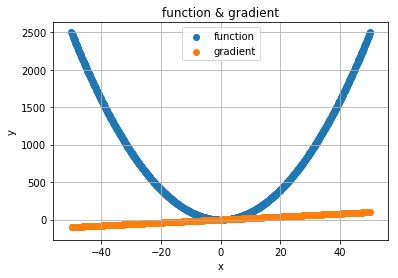

In [129]:
func=function_2
ｆ = function_min(func)
graph_1(func)
graph_gradient(func)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x=-0.20で最小となり、最小値はy= 1.0。前後の傾きは-0.417,  0.025


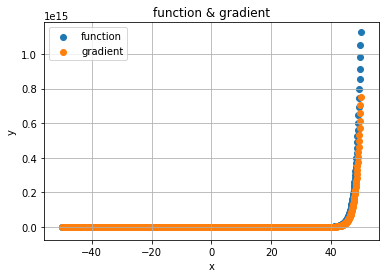

In [130]:
func=function_3
ｆ = function_min(func)
graph_1(func)
graph_gradient(func)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x=-0.16で最小となり、最小値はy= 0.9。前後の傾きは-0.042,  0.003


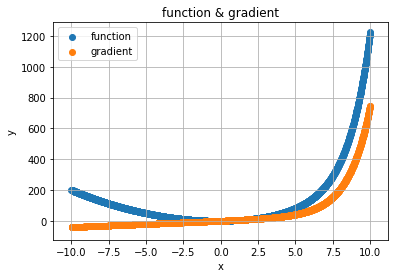

In [131]:
func=function_3
ｆ = function_min(func, -10, 10, 0.01)
graph_1(func, -10, 10, 0.01)
graph_gradient(func, -10, 10, 0.01)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x= 22.20で最小となり、最小値はy=-1.0。前後の傾きは-0.001,  0.000


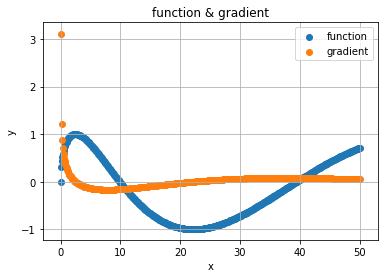

In [133]:
func=function_4
ｆ = function_min(func, 0, 50, 0.1)
graph_1(func, 0, 50, 0.1)
graph_gradient(func, 0, 50, 0.1)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x= 4.70で最小となり、最小値はy=-1.0。前後の傾きは-0.062,  0.038


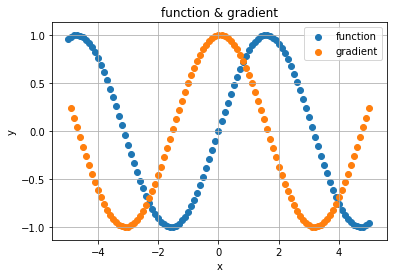

In [135]:
func=function_5
ｆ = function_min(func, -5, 5, 0.1)
graph_1(func, -5, 5, 0.1)
graph_gradient(func, -5, 5, 0.1)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

x= 0.00で最小となり、最小値はy= 1.0。前後の傾きは-0.100,  0.100


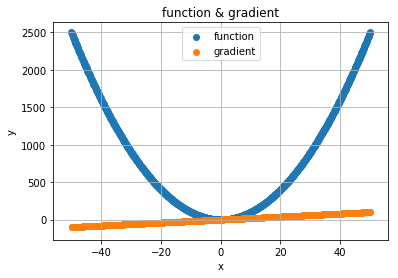

In [136]:
func=function_6
ｆ = function_min(func)
graph_1(func)
graph_gradient(func)
print('x={: .2f}で最小となり、最小値はy={: .1f}。前後の傾きは{: .3f}, {: .3f}'.format(f[0], f[1], f[2], f[3]))

## 考察
 
 最小値の前後の傾きは０に近く符号が変化している  
 これは最小値での傾きが０であることを示唆している